In [169]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from google.colab import files
uploaded = files.upload()

Saving plant_disease_dataset.csv to plant_disease_dataset (1).csv


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             10000 non-null  float64
 1   humidity                10000 non-null  float64
 2   rainfall                10000 non-null  float64
 3   soil_pH                 10000 non-null  float64
 4   TARGET_COL = "disease"  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [109]:
df = pd.read_csv("plant_disease_dataset.csv")

print("Dataset Shape:", df.shape)
df.head(10)


Dataset Shape: (10000, 5)


,temperature,humidity,rainfall,soil_pH,"TARGET_COL = ""disease"""
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
5,23.829315,32.289578,2.058564,5.727685,0
6,32.896064,50.008205,0.315200,7.843564,0
7,28.837174,32.183279,19.999401,7.880548,0
8,22.652628,31.523728,5.047287,5.047016,0
9,27.712800,48.185946,3.063416,4.426779,0


In [147]:
# The dependent variable (Y) is 'disease'
TARGET_COL = 'TARGET_COL = "disease"'

# The independent variables (X) used for prediction
columns_to_keep = [
    'temperature',
    'humidity',
    'rainfall',
    'soil_pH',
    TARGET_COL
]

cleaned_data = df[columns_to_keep].copy()

print("CLEANED DATA OVERVIEW")
display(cleaned_data.head())

CLEANED DATA OVERVIEW


,temperature,humidity,rainfall,soil_pH,"TARGET_COL = ""disease"""
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [148]:
cleaned_data.isnull().sum()

,0
temperature,0
humidity,0
rainfall,0
soil_pH,0
"TARGET_COL = ""disease""",0


In [149]:
cleaned_data = cleaned_data.drop_duplicates()

In [150]:
cleaned_data.head()

,temperature,humidity,rainfall,soil_pH,"TARGET_COL = ""disease"""
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [151]:
X = cleaned_data[['temperature', 'humidity', 'rainfall', 'soil_pH']]
X.head()

,temperature,humidity,rainfall,soil_pH
0,27.483571,33.215053,0.572758,4.975875
1,24.308678,36.945005,42.522346,8.165266
2,28.238443,34.026189,16.095303,6.316734
3,32.615149,41.104180,20.311015,6.164949
4,23.829233,51.971785,11.851323,8.482468


In [156]:
Y = cleaned_data['TARGET_COL = "disease"']
Y.head()

,"TARGET_COL = ""disease"""
0,1
1,0
2,1
3,0
4,0


In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("--- 2. Random Forest Classifier ---")

# Initialize and train the Random Forest model
# The random forest is an ensemble method that can capture non-linear relationships
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

# Inference and Evaluation
y_pred_rf = model_rf.predict(X_test_scaled)

# Calculate and print metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nOverall Accuracy (Random Forest): {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

--- 2. Random Forest Classifier ---

Overall Accuracy (Random Forest): 0.7480

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      1510
           1       0.25      0.01      0.03       490

    accuracy                           0.75      2000
   macro avg       0.50      0.50      0.44      2000
weighted avg       0.63      0.75      0.65      2000



In [132]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
Xtrain_res, ytrain_res = smote.fit_resample(X_train_scaled, y_train)
model = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=123)
model.fit(Xtrain_res, ytrain_res)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=123)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=0)

In [158]:
X_train

,temperature,humidity,rainfall,soil_pH
7389,29.165897,87.109465,11.898169,6.880607
9275,23.499746,69.531513,1.035339,5.415282
2995,25.387403,34.557117,6.059331,4.710176
5316,17.449794,87.551433,4.088068,4.575964
356,24.907434,44.998216,6.846883,5.533234
...,...,...,...,...
9225,25.904356,81.495978,21.019584,6.658864
4859,24.292371,39.842223,7.075719,8.322508
3264,28.327084,51.568039,17.630938,5.595483
9845,23.806972,77.056476,10.117438,5.200031


In [159]:
X_test

,temperature,humidity,rainfall,soil_pH
9394,25.849873,75.848689,3.805938,4.739751
898,31.032545,33.229888,4.188943,5.075338
2398,26.036337,100.000000,5.705813,5.834636
5906,24.119332,86.826644,4.196454,8.289566
2343,22.369826,47.681941,0.278709,4.945923
...,...,...,...,...
1037,17.678126,44.329729,0.272340,4.815108
2899,26.436645,47.854826,2.171032,8.152816
9549,14.732567,81.481260,1.337896,5.126651
2740,27.074327,100.000000,8.323869,8.083997


In [160]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [161]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

Scaling

In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Building the model

In [164]:
model = LogisticRegression()

In [166]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

TRAINING THE MODEL

In [182]:
    model.fit(X_train, y_train)

LogisticRegression()

INFERENCE

In [167]:
y_pred = model.predict(X_test_scaled)

In [183]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Making the prediction of a single data point with:

1. Sample Code Number = 10000
2. temperature = 1
3. humidity = 2
4. rainfall = 3
5. soil_pH = 4


In [185]:
model.predict(sc.transform([[1,2,3,4,]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [171]:
sample = pd.DataFrame([[-0.05, 0.36, 54.8, 1009.8]],
                      columns=X.columns)

sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
prediction

array([0])

MEAN ABSOLUTE ERROR

In [172]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.2395


MEAN SQUARED ERROR

In [173]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.2395


R SQUARED

In [175]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

-0.2947695634545209

ADJUSTED R SQUARED

In [176]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

-0.29736559265442963

In [118]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [120]:
X

array([[33.2150527 ,  0.57275778,  4.9758751 ],
       [36.94500537, 42.52234633,  8.16526563],
       [34.02618939, 16.09530324,  6.31673402],
       ...,
       [81.89176985, 13.4268688 ,  7.10158325],
       [88.56764865,  9.71965871,  7.73262046],
       [71.90040098,  4.88639063,  4.3835364 ]])

In [177]:
y

array([1, 0, 1, ..., 0, 0, 0])

FEATURE SCALING

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [181]:
X_train

array([[ 0.60702428,  1.10769269,  0.21773255,  0.48839843],
       [-0.36768708,  0.33249905, -0.88490351, -0.63676867],
       [-0.04296567, -1.20988359, -0.37494112, -1.1781921 ],
       ...,
       [ 0.46272871, -0.45969618,  0.79963958, -0.49839927],
       [-0.31483685,  0.66435246,  0.03697869, -0.80205162],
       [ 0.37453572, -1.61252452, -0.4077852 ,  1.08183392]])

EVALUATING THE MODEL

ROC CURVE

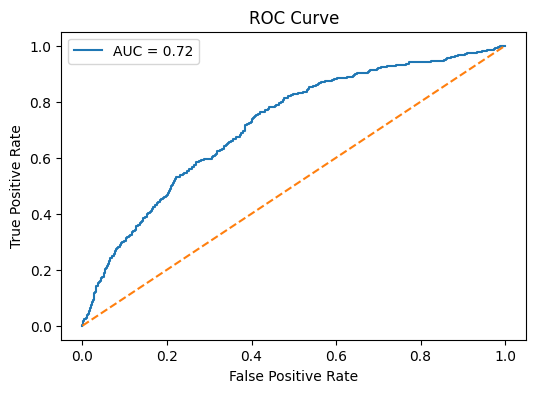

In [197]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

CONFUSION MATRIX

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1469,   41],
       [ 438,   52]])

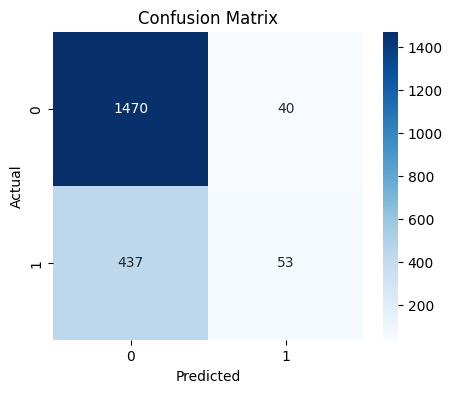

In [195]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


FEATURE IMPORTANCE

In [198]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

feature_importance.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
1,humidity,0.509281
2,rainfall,0.472921
0,temperature,0.015357
3,soil_pH,-0.194670


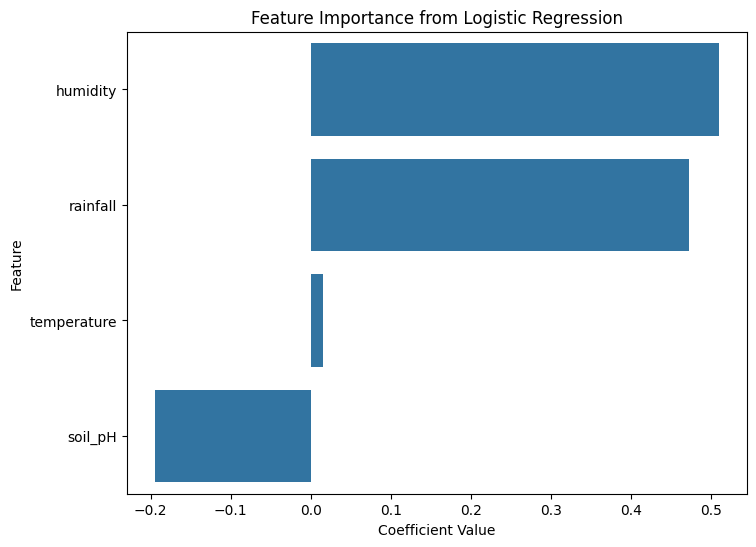

In [200]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient', ascending=False))
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

ACCURACY

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7605

In [202]:
(1469+52)/(438+1469+52+41)

0.7605